# Exploratory Data Analysis

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
final_df = pd.read_csv('final_df.csv')

#### 1. pIC50 Distribution

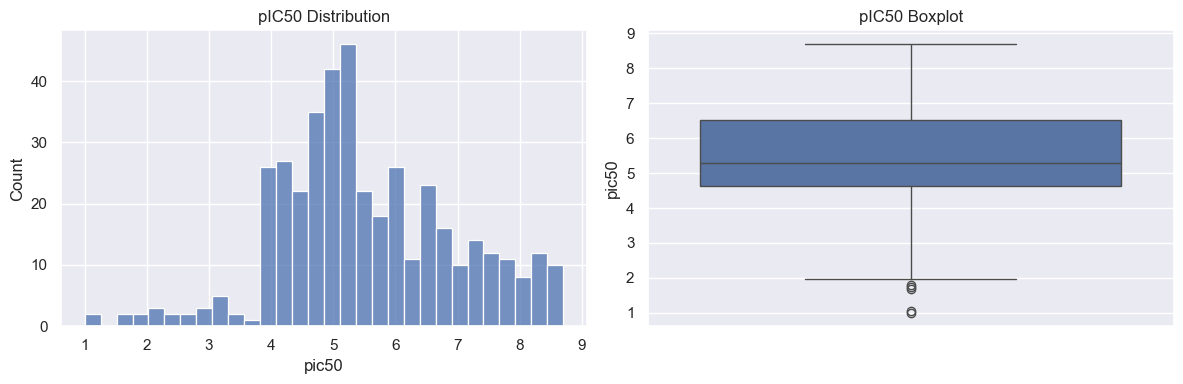

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(data=final_df, x='pic50', bins=30)
plt.title('pIC50 Distribution')

plt.subplot(122)
sns.boxplot(y=final_df['pic50'])
plt.title('pIC50 Boxplot')
plt.tight_layout()
plt.show()

The left plot (histogram) shows the distribution of pIC50 values, which are mostly concentrated around 5-6, with a skew towards lower values. The right plot (boxplot) provides a summary of the distribution, indicating a median around 5.5-6, with some outliers on the lower end. This suggests that most compounds have moderate to high activity, but a few have significantly lower potency.

#### 2. Key Descriptor Relationships

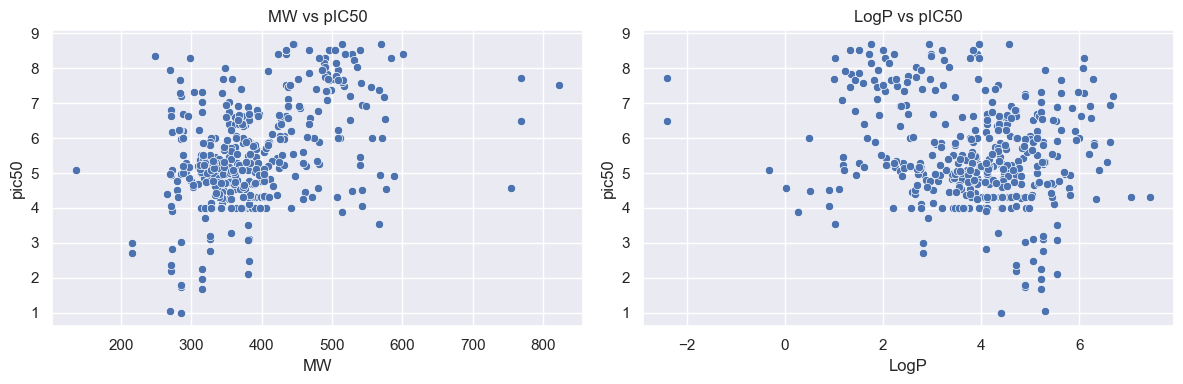

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.scatterplot(data=final_df, x='MW', y='pic50')
plt.title('MW vs pIC50')

plt.subplot(122)
sns.scatterplot(data=final_df, x='LogP', y='pic50')
plt.title('LogP vs pIC50')
plt.tight_layout()
plt.show()

The left scatter plot (MW vs. pIC50) suggests a weak to moderate correlation between molecular weight (MW) and pIC50, with most compounds clustered around MW 300-500. Some higher MW compounds show strong activity (higher pIC50).

The right scatter plot (LogP vs. pIC50) shows a more scattered distribution, indicating no strong correlation. However, higher LogP values (above 4) tend to have more spread-out activity, suggesting lipophilicity influences potency but not in a straightforward manner.

#### 3. Descriptors Correlation Matrix

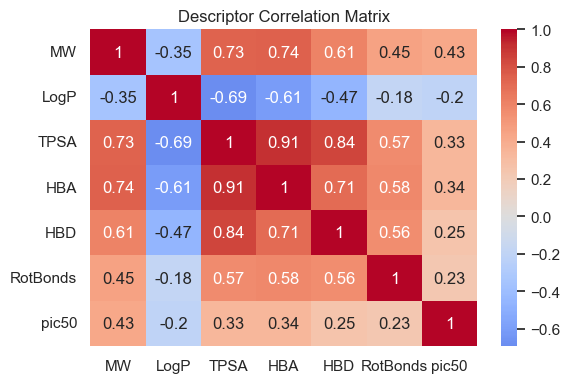

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(final_df[['MW', 'LogP', 'TPSA', 'HBA', 'HBD', 'RotBonds', 'pic50']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Descriptor Correlation Matrix')
plt.tight_layout()
plt.show()

#### 4. Fingerprint Analysis

In [8]:
fp_sum = final_df[[col for col in final_df.columns if 'bit_' in col]].sum()
most_common_bits = fp_sum.nlargest(10)
print("\nMost common fingerprint bits:")
print(most_common_bits)


Most common fingerprint bits:
bit_356    415
bit_849    414
bit_726    404
bit_807    371
bit_650    347
bit_893    308
bit_64     301
bit_875    301
bit_935    297
bit_33     285
dtype: int64


#### 5. Property Distributions

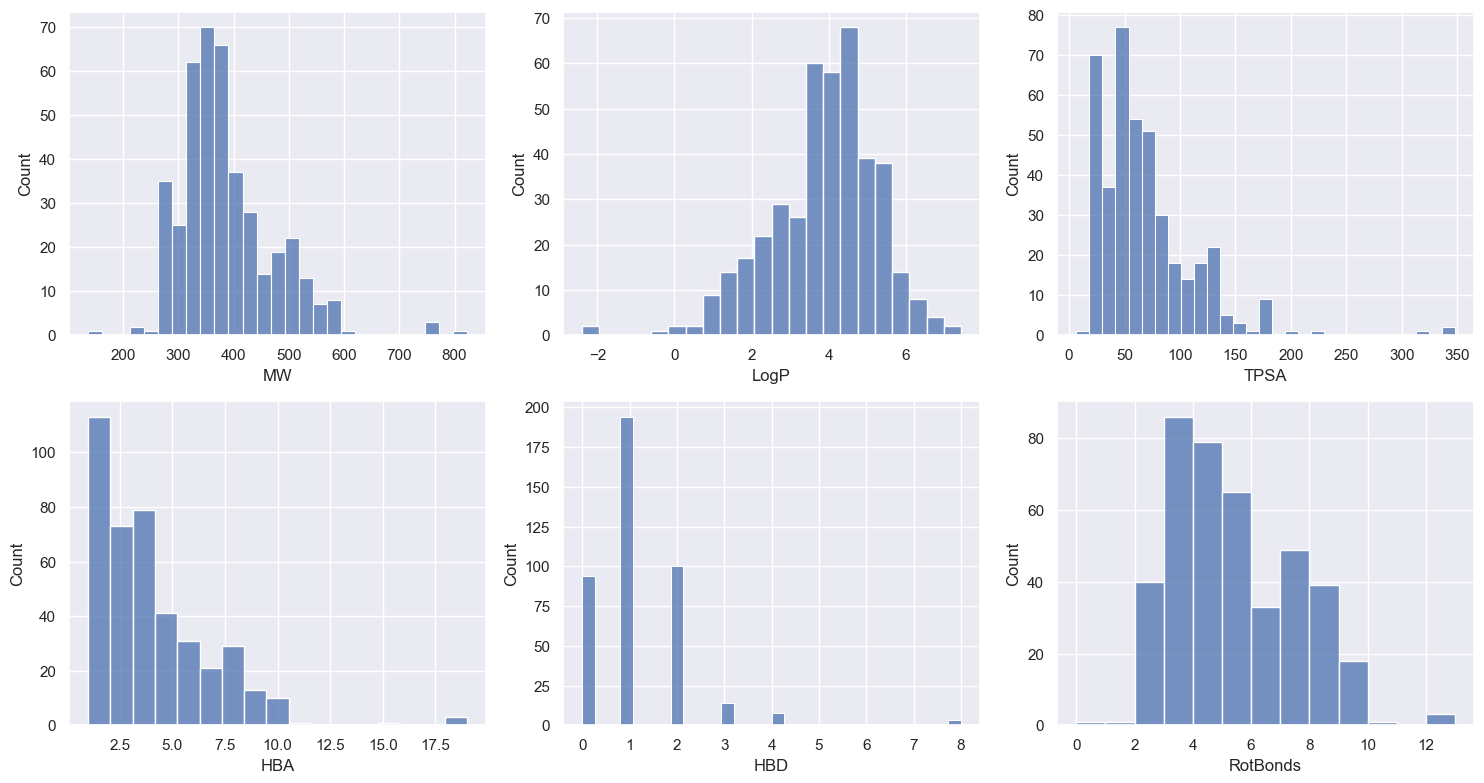

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, col in enumerate(['MW', 'LogP', 'TPSA', 'HBA', 'HBD', 'RotBonds']):
    sns.histplot(data=final_df, x=col, ax=axes[idx//3, idx%3])
plt.tight_layout()
plt.show()

MW (Molecular Weight): Most compounds have MW between 300-500, with a peak around 350-400.

LogP (Lipophilicity): The majority fall between 2-5, indicating moderate lipophilicity.

TPSA (Topological Polar Surface Area): Skewed towards lower values, suggesting most compounds have low polar surface area.

HBA (Hydrogen Bond Acceptors): Most compounds have low HBA, usually under 5.

HBD (Hydrogen Bond Donors): Majority have 0-2 HBD, indicating weak hydrogen bonding capacity.

RotBonds (Rotatable Bonds): Most compounds have 3-7 rotatable bonds, balancing flexibility and rigidity.

#### 6. Chemical Space Analysis

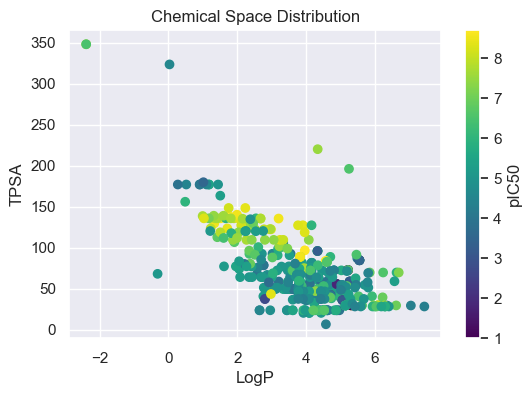

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(final_df['LogP'], final_df['TPSA'], c=final_df['pic50'], cmap='viridis')
plt.colorbar(label='pIC50')
plt.xlabel('LogP')
plt.ylabel('TPSA')
plt.title('Chemical Space Distribution')
plt.show()

This plot represents the Chemical Space Distribution, showing the relationship between LogP (lipophilicity) and TPSA (topological polar surface area) for various compounds.

Trend: There is a negative correlation—compounds with higher LogP tend to have lower TPSA.

Color Representation: The color scale indicates pIC50 (biological activity), where yellow represents higher activity and dark purple represents lower activity.

Observation: Compounds with moderate LogP (around 2-4) and low-to-moderate TPSA show higher biological activity (yellow).